Caitlin Neppl  
ENGL 3246: Fandom in the Digital Age  
Prof. Christopher Haynes  
Fall 2020  

# Making Fandom Project: <br/> r/gameofthrones Episode Discussion Sentiment Analysis

When trying to come up with an idea for this project, I knew I wanted to do something kind of data visualization, but wasn't sure what aspect of fandom I wanted to explore. Sentiment analysis is a natural language processing task that, given some text input, classifies it as positive, negative, or neutral. I thought this could be interesting to see applied to comments made by fans about some sequential form of media that could be tracked over time. Although this sentiment analysis is  not terribly precise - it will group both sad and angry comments as "negative", for instance - I still think that this project captures the highs and lows of the fandom experience.  

HBO's Game of Thrones has had a robust fanbase since the beginning, as it is adapted from George RR Martin's "A Song of Ice and Fire" novels. It quickly boomed in popularity, with viewership at one point reaching 17.8 million. With all the twists and turns, fans were taken on a rollercoaster journey following the contestents for the Iron Throne. My goal for my data visualization was to reflect fan's attitudes/emotional states over the eight years the show ran. My intuition was that sentiment analysis would be able to point out the most shocking twists and most satisfying moments in the show. I was also curious if the last few seasons had noticeably different sentiment, as it was my experience that after the TV series reached the end point of ASOIAF's canon, the story wasn't as good. The last season in particular was divisive amongst people I spoke to about it at the time, so I was curious if the sentiment analyzer would pick up on that. 

I decided to source my fandom comments from r/gameofthrones, which today has 2.1 million subscribers. Each episode since the first has had a dedicated discussion post, where fans came after each episode was released to connect with other fans and share opinions and ideas about . These discussion posts contain the comments I analyzed through a pre-built sentiment analyzer.   

This project uses Python, PRAW, NLTK's VADER sentiment analyzer, and matplotlib/seaborn. The code is below, along with some context on my decision-making.

In [1]:
# FIRST: a horrible dictionary to store episode names / reddit urls!
episodes = {
    "s1e01": "https://www.reddit.com/r/gameofthrones/comments/gsd0t/episode_discussion_101_winter_is_coming_spoilers/",
    "s1e02": "https://www.reddit.com/r/gameofthrones/comments/gwlcx/episode_discussion_102_the_kingsroad_spoilers/",
    "s1e03": "https://www.reddit.com/r/gameofthrones/comments/h1otp/episode_discussion_103_lord_snow_spoilers/",
    "s1e04": "https://www.reddit.com/r/gameofthrones/comments/h70vv/episode_discussion_104_cripples_bastards_and/",
    "s1e05": "https://www.reddit.com/r/gameofthrones/comments/hc5ts/episode_discussion_105_the_wolf_and_the_lion/",
    "s1e06": "https://www.reddit.com/r/gameofthrones/comments/hhn7n/episode_discussion_106_a_golden_crown/",
    "s1e07": "https://www.reddit.com/r/gameofthrones/comments/hnvkl/episode_discussion_107_you_win_or_you_die/",
    "s1e08": "https://www.reddit.com/r/gameofthrones/comments/hry6g/episode_discussion_108_the_pointy_end/",
    "s1e09": "https://www.reddit.com/r/gameofthrones/comments/hxiwe/episode_discussion_109_baelor_tv_spoilers/",
    "s1e10": "https://www.reddit.com/r/gameofthrones/comments/i3z96/episode_discussion_110_fire_and_blood_tv_spoilers/",
    
    "s2e01": "https://www.reddit.com/r/gameofthrones/comments/roo4f/episode_discussion_21_the_north_remembers_tv/",
    "s2e02": "https://www.reddit.com/r/gameofthrones/comments/s00ti/episode_discussion_22_the_night_lands_tv_spoilers/",
    "s2e03": "https://www.reddit.com/r/gameofthrones/comments/sbgek/episode_discussion_203_what_is_dead_may_never_die/",
    "s2e04": "https://www.reddit.com/r/gameofthrones/comments/snedo/episode_discussion_204_garden_of_bones_tv_spoilers/",
    "s2e05": "https://www.reddit.com/r/gameofthrones/comments/syuft/episode_discussion_205_the_ghost_of_harrenhal_tv/",
    "s2e06": "https://www.reddit.com/r/gameofthrones/comments/tafrr/episode_discussion_206_the_old_gods_and_the_new/",
    "s2e07": "https://www.reddit.com/r/gameofthrones/comments/tl9i8/episode_discussion_207_a_man_without_honor_tv/",
    "s2e08": "https://www.reddit.com/r/gameofthrones/comments/twns8/episode_discussion_208_the_prince_of_winterfell/",
    "s2e09": "https://www.reddit.com/r/gameofthrones/comments/u7dgj/episode_discussion_209_blackwater_tv_spoilers/",
    "s2e10": "https://www.reddit.com/r/gameofthrones/comments/uj7zb/episode_discussion_210_valar_morghulis_tv_spoilers/",
    
    "s3e01": "https://www.reddit.com/r/gameofthrones/comments/1be1x3/episode_discussion_301_valar_dohaeris_season_3/",
    "s3e02": "https://www.reddit.com/r/gameofthrones/comments/1bvp25/episode_discussion_302_dark_wings_dark_words/",
    "s3e03": "https://www.reddit.com/r/gameofthrones/comments/1ccx1t/episode_discussion_303_walk_of_punishment_season/",
    "s3e04": "https://www.reddit.com/r/gameofthrones/comments/1cu0rx/episode_discussion_304_and_now_his_watch_is_ended/",
    "s3e05": "https://www.reddit.com/r/gameofthrones/comments/1db0of/episode_discussion_305_kissed_by_fire_season_3/",
    "s3e06": "https://www.reddit.com/r/gameofthrones/comments/1drfve/season_3_spoilers_episode_discussion_306_the_climb/",
    "s3e07": "https://www.reddit.com/r/gameofthrones/comments/1e7q6c/season_3_spoilers_episode_discussion_307_the_bear/",
    "s3e08": "https://www.reddit.com/r/gameofthrones/comments/1enxeb/season_3_spoilers_episode_discussion_308_second/",
    "s3e09": "https://www.reddit.com/r/gameofthrones/comments/1fjuiv/season_3_spoilers_episode_discussion_309_the/",    
    "s3e10": "https://www.reddit.com/r/gameofthrones/comments/1g0iz9/season_3_spoilers_episode_discussion_310_mhysa/",
    
    "s4e01": "https://www.reddit.com/r/gameofthrones/comments/22dyc7/season_4_spoilers_premiere_discussion_401_two/",
    "s4e02": "https://www.reddit.com/r/gameofthrones/comments/22yrz0/season_4_spoilers_premiere_discussion_402_the/",
    "s4e03": "https://www.reddit.com/r/gameofthrones/comments/23jx2l/season_4_spoilers_premiere_discussion_403_breaker/",
    "s4e04": "https://www.reddit.com/r/gameofthrones/comments/245c4b/season_4_spoilers_premiere_discussion_404/",
    "s4e05": "https://www.reddit.com/r/gameofthrones/comments/24qjb3/season_4_spoilers_premiere_discussion_405_first/",
    "s4e06": "https://www.reddit.com/r/gameofthrones/comments/25bla1/season_4_spoilers_premiere_discussion_406_the/",
    "s4e07": "https://www.reddit.com/r/gameofthrones/comments/25znwn/season_4_spoilers_postepisode_discussion_407/",
    "s4e08": "https://www.reddit.com/r/gameofthrones/comments/272m7f/season_4_spoilers_premiere_discussion_408_the/",
    "s4e09": "https://www.reddit.com/r/gameofthrones/comments/27nrco/season_4_spoilers_premiere_discussion_409_the/",
    "s4e10": "https://www.reddit.com/r/gameofthrones/comments/28buqa/season_4_spoilers_postepisode_discussion_410_the/",
    
    "s5e01": "https://www.reddit.com/r/gameofthrones/comments/32e9uc/s5_postpremiere_discussion_501_the_wars_to_come/",
    "s5e02": "https://www.reddit.com/r/gameofthrones/comments/336stg/s5_postpremiere_discussion_502_the_house_of_black/",
    "s5e03": "https://www.reddit.com/r/gameofthrones/comments/33zfzq/s5_postpremiere_discussion_503_high_sparrow/",
    "s5e04": "https://www.reddit.com/r/gameofthrones/comments/34s2jz/s5_postpremiere_discussion_504_the_sons_of_the/",
    "s5e05": "https://www.reddit.com/r/gameofthrones/comments/35jweb/s5_postpremiere_discussion_505_kill_the_boy/",
    "s5e06": "https://www.reddit.com/r/gameofthrones/comments/36bnvu/s5_postpremiere_discussion_506_unbowed_unbent/",
    "s5e07": "https://www.reddit.com/r/gameofthrones/comments/375l8f/s5_postpremiere_discussion_507_the_gift/",
    "s5e08": "https://www.reddit.com/r/gameofthrones/comments/3812yb/s5_postpremiere_discussion_508_hardhome/",
    "s5e09": "https://www.reddit.com/r/gameofthrones/comments/38z67y/s5_postpremiere_discussion_509_the_dance_of/",
    "s5e10": "https://www.reddit.com/r/gameofthrones/comments/39v7w7/s5_postpremiere_discussion_510_mothers_mercy/",
    
    "s6e01": "https://www.reddit.com/r/gameofthrones/comments/4gb8j3/s6e1_postpremiere_discussion_s6e1_the_red_woman/",
    "s6e02": "https://www.reddit.com/r/gameofthrones/comments/4hdflw/s6e2_postpremiere_discussion_s6e2_home/",
    "s6e03": "https://www.reddit.com/r/gameofthrones/comments/4ihick/s6e3_postpremiere_discussion_s6e3_oathbreaker/",
    "s6e04": "https://www.reddit.com/r/gameofthrones/comments/4jj4n1/s6e4_postpremiere_discussion_s6e4_book_of_the/",
    "s6e05": "https://www.reddit.com/r/gameofthrones/comments/4klpws/s6e5_postpremiere_discussion_s6e5_the_door/",
    "s6e06": "https://www.reddit.com/r/gameofthrones/comments/4lndyk/s6e6_postpremiere_discussion_s6e6_blood_of_my/",
    "s6e07": "https://www.reddit.com/r/gameofthrones/comments/bqkmxk/spoilers_s8e6_series_finale_postepisode_discussion/",
    "s6e08": "https://www.reddit.com/r/gameofthrones/comments/4nthy1/s6e8_postpremiere_discussion_s6e8_no_one/",
    "s6e09": "https://www.reddit.com/r/gameofthrones/comments/4owdkh/s6e9_postpremiere_discussion_s6e9_battle_of_the/",
    "s6e10": "https://www.reddit.com/r/gameofthrones/comments/4q0yeg/s6e10_postpremiere_discussion_s6e10_the_winds_of/",
    
    "s7e01": "https://www.reddit.com/r/gameofthrones/comments/6nq82n/s7e1_postpremiere_discussion_s7e1_dragonstone/",
    "s7e02": "https://www.reddit.com/r/gameofthrones/comments/6p5hhf/s7e2_postpremiere_discussion_s7e2_stormborn/",
    "s7e03": "https://www.reddit.com/r/gameofthrones/comments/6qlhfg/s7e3_postpremiere_discussion_s7e3_the_queens/",
    "s7e04": "https://www.reddit.com/r/gameofthrones/comments/6s2j7s/s7e4_postpremiere_discussion_s7e4_the_spoils_of/",
    "s7e05": "https://www.reddit.com/r/gameofthrones/comments/6tjeos/s7e5_postpremiere_discussion_s7e5_eastwatch/",
    "s7e06": "https://www.reddit.com/r/gameofthrones/comments/6uzyau/s7e6_postpremiere_discussion_s7e6_beyond_the_wall/",
    "s7e07": "https://www.reddit.com/r/gameofthrones/comments/6wgibh/s7e7_postpremiere_discussion_s7e7_the_dragon_and/",
    
    "s8e01": "https://www.reddit.com/r/gameofthrones/comments/bd6ngg/spoilers_postpremiere_discussion_season_8_episode/",
    "s8e02": "https://www.reddit.com/r/gameofthrones/comments/bf3nsm/spoilers_postepisode_discussion_season_8_episode_2/",
    "s8e03": "https://www.reddit.com/r/gameofthrones/comments/bhhnvj/spoilers_postepisode_discussion_season_8_episode_3/",
    "s8e04": "https://www.reddit.com/r/gameofthrones/comments/bkdxfl/spoilers_postepisode_discussion_season_8_episode_4/",
    "s8e05": "https://www.reddit.com/r/gameofthrones/comments/bn6xey/spoilers_postepisode_discussion_season_8_episode_5/",
    "s8e06": "https://www.reddit.com/r/gameofthrones/comments/bqkmxk/spoilers_s8e6_series_finale_postepisode_discussion/",
}

### PRAW

PRAW (Python Reddit API Wrapper), is a developer tool that allows API access to Reddit. I had to create a developer app for this, and it's super easy to get into, so I'm excited to do more projects using it. The below code iterates through my dictionary of episodes, fetches all of the comments from the specified url, and stores the data in a Pandas dataframe.  

In [11]:
import praw
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

reddit = praw.Reddit('got_fandomSentiment', user_agent='GoT_fandomSentiment (by /u/sorghums)')
print(reddit.user.me())

sorghums


In [3]:
# initialize pd dataframe
dfGoT = pd.DataFrame()
text = []    
ep = []

for e in episodes:
    discussion = reddit.submission(url=episodes[e]) # instantiate reddit instance
    discussion.comments.replace_more(limit=0)     # traverse comments w commentForest (BFS)
    
    for comment in discussion.comments.list():
        ep.append(e) # episode name
        text.append([comment.body])

dfGoT['episode'] = ep
dfGoT['comment'] = text
dfGoT.head(10)  


,episode,comment
0,s1e01,[That was the coolest title sequence ever. ]
1,s1e01,"[""The things I do for love.""]"
2,s1e01,"[As soon as I saw Joffrey, I wanted to smack t..."
3,s1e01,[I'm slightly worried it might be too confusin...
4,s1e01,"[Oh man, Bran's wolf is so cute. I hope to se..."
5,s1e01,[Did anyone else find Viserys to be surprising...
6,s1e01,[Anyone else think Joffrey and Viserys were ca...
7,s1e01,[And I love how Arya was running around with a...
8,s1e01,[I loved it. That Dany/Drogo scene was brutal ...
9,s1e01,[Oh my god. So Fucking Good. I've torn through...


## Sentiment Analysis

I decided to use a pre-built sentiment analysis tool and NLTK (Natural Language ToolKit) supports VADER, which stands for "Valence Aware Dictionary and sEntiment Reasoner". I thought VADER would be a great choice because it was trained on social media posts, and my data is all Reddit comments! From VADER, I used the Sentiment Intensity Analyzer, which assigns its input a number between 0 and 1 for negative, neutral, and positive sentiments. I ended up using the "compound" measurement, which is a normalized value between -1 and 1 (-1 is peak negative, and 1 is peak positive), for my visualizations.  

In [8]:
# use NLTK's Vader to quantify sentiment polarity per comment

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for index,row in dfGoT.iterrows():
    comment = dfGoT.loc[index,'comment'] # fetch comment
    # store polarity scores in df
    dfGoT.loc[index,'compound'] = sid.polarity_scores(comment[0])['compound']
    dfGoT.loc[index,'neg'] = sid.polarity_scores(comment[0])['neg']
    dfGoT.loc[index,'neu'] = sid.polarity_scores(comment[0])['neu']
    dfGoT.loc[index,'pos'] = sid.polarity_scores(comment[0])['pos']

dfGoT.head(10)

,episode,comment,compound,neg,neu,pos
0,s1e01,[That was the coolest title sequence ever. ],0.0000,0.000,1.000,0.000
1,s1e01,"[""The things I do for love.""]",0.0000,0.000,1.000,0.000
2,s1e01,"[As soon as I saw Joffrey, I wanted to smack t...",0.0000,0.000,1.000,0.000
3,s1e01,[I'm slightly worried it might be too confusin...,-0.4951,0.178,0.822,0.000
4,s1e01,"[Oh man, Bran's wolf is so cute. I hope to se...",0.7932,0.000,0.630,0.370
5,s1e01,[Did anyone else find Viserys to be surprising...,0.7639,0.000,0.651,0.349
6,s1e01,[Anyone else think Joffrey and Viserys were ca...,0.8734,0.040,0.730,0.230
7,s1e01,[And I love how Arya was running around with a...,0.6369,0.000,0.819,0.181
8,s1e01,[I loved it. That Dany/Drogo scene was brutal ...,-0.4767,0.414,0.355,0.231
9,s1e01,[Oh my god. So Fucking Good. I've torn through...,0.9815,0.044,0.717,0.239


## Exploring the Data

By sorting the dataframe in descending order, we can see the most positive comments, and the most negative! Note the most negative comment, in reaction to Jon Snow's death: "STAB!!\n\nSTAAAAAAAAABBB!\n\nSTAB STAB STAB". This shows how VADER thinks: yelling negative words over and over again multiplies its badness, in all caps no less. 

In [34]:
dfGoT.sort_values(by='compound', ascending=False)

,episode,comment,compound,neg,neu,pos
6429,s2e05,[Off the top of my head... wow. Acting. This w...,0.9964,0.062,0.666,0.272
9870,s3e02,[What a fantastic episode tonight. Last week w...,0.9954,0.091,0.643,0.266
1342,s1e04,[the biggest thing is definitely the lackluste...,0.9953,0.067,0.756,0.177
32778,s8e01,[I loved all the parallels between this episod...,0.9937,0.056,0.842,0.102
8463,s2e09,"[Okay, I knew it was going to be good... but H...",0.9935,0.087,0.748,0.165
1692,s1e05,"[An excellent episode, probably the best yet, ...",0.9930,0.031,0.751,0.218
1113,s1e03,[I actually thought the books didn't do as goo...,0.9920,0.054,0.806,0.140
2862,s1e07,[You're laying a lot of intent onto Jorah. The...,0.9920,0.012,0.772,0.217
3056,s1e08,"[Best episode yet. Really, everything was fan...",0.9904,0.057,0.711,0.232
4914,s2e02,[Just wanted to weigh in here:\n\nShowing what...,0.9904,0.000,0.786,0.214


In [20]:
dfGoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35706 entries, 0 to 35705
Data columns (total 6 columns):
episode     35706 non-null object
comment     35706 non-null object
compound    35706 non-null float64
neg         35706 non-null float64
neu         35706 non-null float64
pos         35706 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.6+ MB


## Averaging

Right now we've got a huge list of Reddit comments - 35,7006 comments, to be exact! Plotting this would be a nightmare, so I decided to collapse it by computing the average of all the sentiment scores per episode. This way, we can get a polarity score for a particular episode, and compare them against one another.

In [7]:
# convert df to mean of all comment compound scores grouped by episode discussion 
dfSentiment = dfGoT.groupby(['episode'], as_index=False)['pos','neu', 'neg','compound',].mean()
dfSentiment.head(10)

,episode,pos,neu,neg,compound
0,s1e01,0.144354,0.789154,0.066496,0.224695
1,s1e02,0.123979,0.788104,0.087904,0.066459
2,s1e03,0.126881,0.789284,0.083827,0.115415
3,s1e04,0.109611,0.823414,0.066960,0.135983
4,s1e05,0.113458,0.798752,0.085784,0.067017
5,s1e06,0.141403,0.783902,0.074683,0.161800
6,s1e07,0.115887,0.798476,0.085629,0.072365
7,s1e08,0.108766,0.812788,0.076236,0.066578
8,s1e09,0.103705,0.793858,0.102443,0.024637
9,s1e10,0.114886,0.805389,0.077655,0.096662


## Plotting

Now how to actually plot it? Looking at other sentiment analyses online, there's quite a few line charts out there. Here I do just that. In a particularly inspired move, I put a horizontal line at 0 so we could see where things started getting negative.  

Coming off of an especially high start, Game of Thrones fans cooled off over time. The line graph is nice in that it shows the slope between episodes, so we can see how people's attitudes shifted from one week to the next.

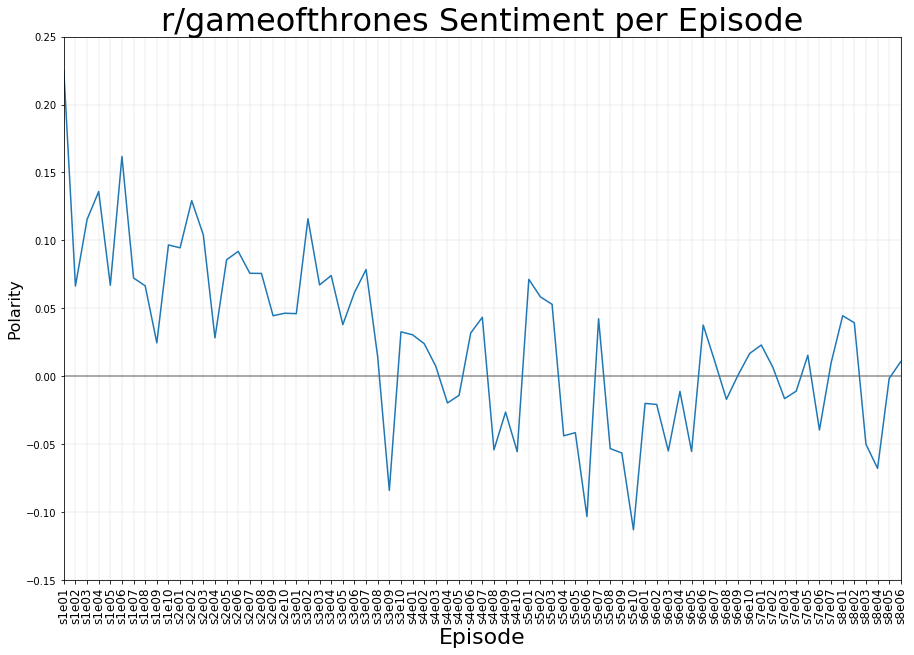

In [23]:
# line plot
fig, ax = plt.subplots(figsize=(15,10))

dfSentiment.plot(x="episode", y="compound", ax=ax, legend=False);
ax.set_title("r/gameofthrones Sentiment per Episode", fontsize=32)
ax.set_xlabel("Episode", fontsize=22)

plt.xticks(range(0,len(dfSentiment["episode"])),dfSentiment["episode"], rotation=90, fontsize=12)
ax.set_ylabel("Discussion Polarity", fontsize=16)
ax.set_ylim(-0.15, 0.25)

ax.hlines(0, -1, 73, alpha=0.4)

plt.grid(linewidth = 0.2)

## Bar Plot 

Inspired by the information imparted by the line plot's horizontal line, I thought a more effective visualiztion could be a bidirectional bar graph, where the x value represents the mean compound sentiment score's displacement from zero for each episode. This has the effect of making it more clear which episodes had positive or negative sentiment. In this plot, extreme reactions to certain episodes are very apparent. 

There's a turning point around Season 3 Episode 9 - this episode contains the "Red Wedding" massacre, and looking at the compound score, there must have been a lot of anguish in that discussion thread! 

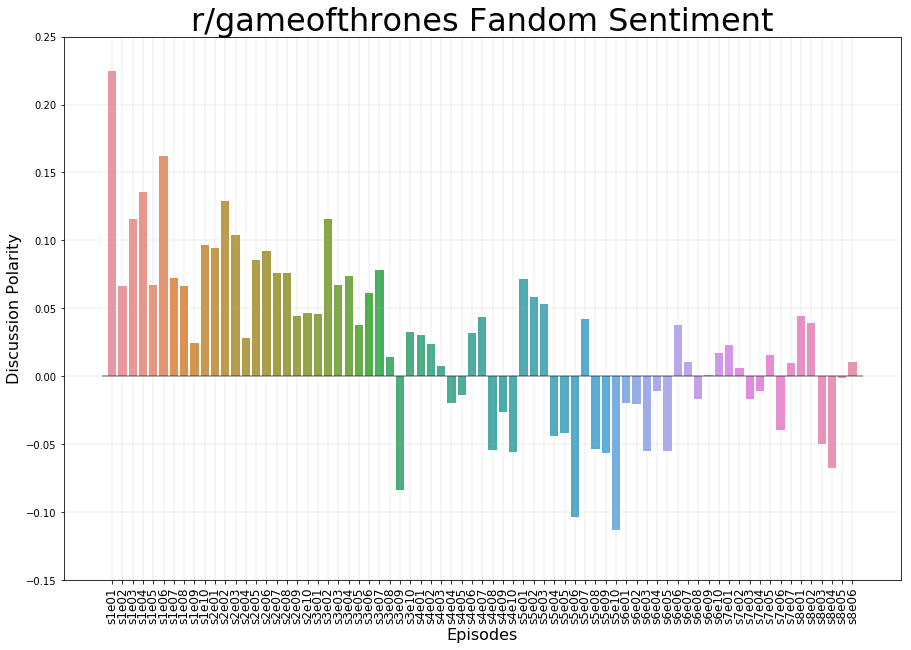

In [35]:
# barplot
fig, ax = plt.subplots(figsize=(15,10))

ax=sns.barplot(x='episode', y='compound', data=dfSentiment)

ax.set_xlabel('Episodes', fontsize=16)
ax.set_ylabel('Discussion Polarity', fontsize=16)
ax.set_title("r/gameofthrones Fandom Sentiment",fontsize=32)
ax.set_ylim(-0.15, 0.25)

#styling 
plt.grid(linewidth = 0.2)
ax.hlines(0, -1, 73, alpha=0.4)
plt.xticks(range(0,len(dfSentiment["episode"])),dfSentiment["episode"], rotation=90, fontsize=12)

# NOTE: annotations added in photoshop bc i hate matplotlib's annot functionality 
plt.savefig("GoT_FandomSentiment.png")

plt.show()

## Reflection

I went into the project naively thinking it'd be a breeze to use all these libraries I've never used before, and I learned that Murphy's Law is relentless. Between spending like 3 hours trying to configure PRAW's initialization file and approx 4 hours trying (and failing) to make the colors pretty, I sunk way more time in this project than you might think!  

Game of Thrones was a show I was dragged into - I didn't start watching until 2016, and I have fond memories of bingeing the entire thing on a 13" laptop screen, and going to friends' houses to watch the episodes as they premiered. In doing this project, I gained a new appreciation for 1) the emotional turmoil Game of Thrones fans have been through, and 2) how finicky data science is.  

Mapping the peaks and valleys to events in the corresponding episodes was really interesting, and it was fun to re-experience Game of Thrones through the process! I used Photoshop to annotate the episodes where sentiment was noticeably skewed towards positive or negative sentiment:  
<img src="GoT_FandomSentiment_annotated.png">  

There's a clear trend towards dissatisfaction over time, which mirrored my experience with the series. It was enlightening to see which episodes in particular were more or less appreciated by the community in r/gameofthrones, and trying to figure out why. In doing so, I read a LOT of episode summaries, and checked out the highest-rated comments to get a sense of what people did or didn't like.   

Overall, I think my visualization does a solid job at representing fandom attitudes, and reflecting how these changed with plot twists and events. When watching media and participating in fandom, we develop deep connections with elements and characters in the world the series crafts, and I think that this graph makes it clear how passionate fans can get - it's all in the words they use. I'm really glad that the sentiment analysis was able to glean true feelings from social media comments, as those are the places that fans gather for discussion, analysis, and reaction to episodes. By blending data science, NLP, and social media, there's a lot to be learned about fandom and the emotional roller coasters we're collectively sent on by connecting with stories.